In [2]:
from cs231n.solver import Solver

In [3]:
import time
import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.fc_net import *

from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.solver import Solver

run the following from the cs231n directory and try again:
python setup.py build_ext --inplace
You may also need to restart your iPython kernel


In [4]:

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [5]:
import cPickle
import os
import numpy as np

def unpickle(file):
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict

def conv_data2image(data):
    return np.rollaxis(data.reshape((3,32,32)),0,3)

def get_cifar10(folder):
    tr_data = np.empty((0,32*32*3))
    tr_labels = np.empty(1)
    '''
    32x32x3
    '''
    for i in range(1,6):
        fname = os.path.join(folder, "%s%d" % ("data_batch_", i))
        data_dict = unpickle(fname)
        if i == 1:
            tr_data = data_dict['data']
            tr_labels = data_dict['labels']
        else:
            tr_data = np.vstack((tr_data, data_dict['data']))
            tr_labels = np.hstack((tr_labels, data_dict['labels']))

    data_dict = unpickle(os.path.join(folder, 'test_batch'))
    te_data = data_dict['data']
    te_labels = np.array(data_dict['labels'])

    bm = unpickle(os.path.join(folder, 'batches.meta'))
    label_names = bm['label_names']

    return tr_data, tr_labels, te_data, te_labels, label_names




In [6]:
if __name__ == '__main__':
    datapath = '/home/gaurav/Documents/Python/cs231n/cifar-10-batches-py'

X_train, y_train, X_test, y_test, label_names10 = get_cifar10(datapath)

In [7]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [8]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [9]:
# Test the affine_forward function
num_inputs = 2
input_shape = (4, 5, 6)
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)

In [10]:
x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
b = np.linspace(-0.3, 0.1, num=output_dim)


In [11]:
N = x.shape[0]
D = np.prod(x.shape[1:])
x2 = x.reshape(N,D)
out = np.dot(x2,w) +b

cache = (x,w,b)

In [12]:
out, _ = affine_forward(x, w, b)
out

array([[ 1.49834967,  1.70660132,  1.91485297],
       [ 3.25553199,  3.5141327 ,  3.77273342]])

In [13]:

correct_out = np.array([[ 1.49834967,  1.70660132,  1.91485297],
                        [ 3.25553199,  3.5141327,   3.77273342]])

In [14]:

# Compare your output with ours. The error should be around 1e-9.
print 'Testing affine_forward function:'
print 'difference: ', rel_error(out, correct_out)

Testing affine_forward function:
difference:  9.76984946819e-10


In [74]:
x = np.random.randn(10, 2, 3)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)

_, cache = affine_forward(x, w, b)

In [ ]:
x, w, b = cache
  dx, dw, db = None, None, None
  N = x.shape[0]
  xdim = np.prod(x.shape[1:])
  xr = x.reshape((N, xdim))

  dx = dout.dot(w.transpose())
  dx = dx.reshape(x.shape)

  dw = xr.transpose().dot(dout)
  db = dout.sum(axis=0)

In [87]:
x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

In [106]:
out, _ = relu_forward(x)

In [105]:
 np.maximum(0,x)

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.04545455,  0.13636364],
       [ 0.22727273,  0.31818182,  0.40909091,  0.5       ]])

In [107]:
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])

# Compare your output with ours. The error should be around 1e-8
print 'Testing relu_forward function:'
print 'difference: ', rel_error(out, correct_out)

Testing relu_forward function:
difference:  4.99999979802e-08


In [108]:
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

_, cache = relu_forward(x)

In [111]:
dx = relu_backward(dout, cache)

array([[ 0.94583466,  0.70982355, -1.09128264,  0.48926066,  0.67368727,
         1.83018878,  0.31909479,  1.27710599,  0.44860331,  1.31257602],
       [ 0.23915348, -0.12447212, -0.83126281,  0.88471709, -0.17058076,
         0.47182362,  1.63540545, -0.92109741,  1.49012407,  0.61475192],
       [-0.43762496,  1.97973729,  0.48683223,  0.1838224 ,  1.13791651,
        -0.24040698,  0.17491183,  0.74391765, -0.08658742, -0.04601487],
       [-1.3796409 , -0.49122249,  0.30714041,  0.98363996, -0.27207952,
        -0.93128278,  0.03125137,  0.73323169,  1.43641072,  0.17093756],
       [ 0.73819355, -1.18005744,  0.8964006 ,  0.4602299 ,  0.81004812,
         0.28860025, -0.17188221, -0.008672  ,  0.07299663, -1.34517345],
       [-0.08724678,  1.37652847,  0.86084411,  0.07849934,  1.77173336,
        -1.65426537, -0.66516038, -0.23146378, -0.78615232,  0.34994894],
       [-0.57148745, -0.92186553,  0.48580768,  1.16294281,  0.98694848,
         0.10621131, -0.66107006, -0.64541479

In [116]:
x = cache

In [117]:
dx = dout*1*(np.maximum(x,0) > 0)

In [139]:
from cs231n.layer_utils import affine_relu_forward, affine_relu_backward

x = np.random.randn(2, 3, 4)
w = np.random.randn(12, 10)
b = np.random.randn(10)
dout = np.random.randn(2, 10)

out, cache = affine_relu_forward(x, w, b)
dx, dw, db = affine_relu_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda x: affine_relu_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_relu_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_relu_forward(x, w, b)[0], b, dout)

print 'Testing affine_relu_forward:'
print 'dx error: ', rel_error(dx_num, dx)
print 'dw error: ', rel_error(dw_num, dw)
print 'db error: ', rel_error(db_num, db)

Testing affine_relu_forward:
dx error:  5.90415485019e-10
dw error:  1.57679861409e-10
db error:  1.89289417491e-11


In [141]:
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

In [151]:
dx_num = eval_numerical_gradient(lambda x: svm_loss(x, y)[0], x, verbose=False)
loss, dx = svm_loss(x, y)


In [152]:
  N = x.shape[0]
  correct_class_scores = x[np.arange(N), y]
  margins = np.maximum(0, x - correct_class_scores[:, np.newaxis] + 1.0)
  margins[np.arange(N), y] = 0
  loss = np.sum(margins) / N
  num_pos = np.sum(margins > 0, axis=1)
  dx = np.zeros_like(x)
  dx[margins > 0] = 1
  dx[np.arange(N), y] -= num_pos
  dx /= N
  return loss, dx


array([0, 1, 2, 3, 4])

In [164]:
N = x.shape[0]
correct_class_scores = x[np.arange(N), y]

In [170]:
margins = np.maximum(0, x - correct_class_scores[:, np.newaxis] + 1.0)

In [178]:
margins[np.arange(N), y] = 0

In [180]:
loss = np.sum(margins) / N

In [187]:
  N = x.shape[0]
  correct_class_scores = x[np.arange(N), y]
  margins = np.maximum(0, x - correct_class_scores[:, np.newaxis] + 1.0)
  margins[np.arange(N), y] = 0
  loss = np.sum(margins) / N
  num_pos = np.sum(margins > 0, axis=1)
  dx = np.zeros_like(x)

In [201]:
  N = x.shape[0]
  correct_class_scores = x[np.arange(N), y]
  margins = np.maximum(0, x - correct_class_scores[:, np.newaxis] + 1.0)
  margins[np.arange(N), y] = 0
  loss = np.sum(margins) / N
  num_pos = np.sum(margins > 0, axis=1)
  dx = np.zeros_like(x)
  dx[margins > 0] = 1
  dx[np.arange(N), y] -= num_pos
  dx /= N
 

In [198]:
dx[margins > 0] = 1
dx[np.arange(N), y] -= num_pos

In [196]:
dx = np.zeros_like(x)
dx[margins > 0] = 1

In [ ]:
  probs = np.exp(x - np.max(x, axis=1, keepdims=True))
  probs /= np.sum(probs, axis=1, keepdims=True)
  N = x.shape[0]
  loss = -np.sum(np.log(probs[np.arange(N), y])) / N
  dx = probs.copy()
  dx[np.arange(N), y] -= 1
  dx /= N
  return loss, dx

In [212]:
  probs = np.exp(x - np.max(x, axis=1, keepdims=True))
  probs /= np.sum(probs, axis=1, keepdims=True)
  N = x.shape[0]
  probs[np.arange(N), y]

array([ 0.10007313,  0.10011748,  0.10014819,  0.1000394 ,  0.10007745,
        0.09998321,  0.09997677,  0.09994484,  0.10002709,  0.09996158,
        0.10005151,  0.10009376,  0.10014602,  0.09993867,  0.09986448,
        0.09996712,  0.10003742,  0.09995007,  0.10011121,  0.099981  ,
        0.10021223,  0.09992489,  0.10017925,  0.09998462,  0.09998643,
        0.10006327,  0.10003683,  0.0999227 ,  0.1000533 ,  0.09990354,
        0.10002631,  0.10009986,  0.10011683,  0.09993946,  0.09987121,
        0.10002211,  0.09995946,  0.09997311,  0.09999233,  0.10008174,
        0.09996966,  0.09998062,  0.10013586,  0.09999868,  0.09995211,
        0.10010781,  0.0999953 ,  0.09989033,  0.10017289,  0.09988456])

In [213]:
np.sum(np.log(probs[np.arange(N), y]))

-115.11999623804763

In [225]:
N, D, H, C = 3, 5, 50, 7
X = np.random.randn(N, D)
y = np.random.randint(C, size=N)

std = 1e-2
model = TwoLayerNet(input_dim=D, hidden_dim=H, num_classes=C, weight_scale=std)

In [227]:
W1_std = abs(model.params['W1'].std() - std)
b1 = model.params['b1']
W2_std = abs(model.params['W2'].std() - std)
b2 = model.params['b2']

In [231]:
model.params['W1'].std()

0.010279845680646785

In [234]:
assert W1_std < std / 10, 'First layer weights do not seem right'
assert np.all(b1 == 0), 'First layer biases do not seem right'
assert W2_std < std / 10, 'Second layer weights do not seem right'
assert np.all(b2 == 0), 'Second layer biases do not seem right'

In [239]:
print 'Testing test-time forward pass ... '
model.params['W1'] = np.linspace(-0.7, 0.3, num=D*H).reshape(D, H)
model.params['b1'] = np.linspace(-0.1, 0.9, num=H)
model.params['W2'] = np.linspace(-0.3, 0.4, num=H*C).reshape(H, C)
model.params['b2'] = np.linspace(-0.9, 0.1, num=C)
X = np.linspace(-5.5, 4.5, num=N*D).reshape(D, N).T

Testing test-time forward pass ... 


In [242]:
scores = model.loss(X)

In [251]:
scores = model.loss(X)
correct_scores = np.asarray(
  [[11.53165108,  12.2917344,   13.05181771,  13.81190102,  14.57198434, 15.33206765,  16.09215096],
   [12.05769098,  12.74614105,  13.43459113,  14.1230412,   14.81149128, 15.49994135,  16.18839143],
   [12.58373087,  13.20054771,  13.81736455,  14.43418138,  15.05099822, 15.66781506,  16.2846319 ]])
scores_diff = np.abs(scores - correct_scores).sum()
assert scores_diff < 1e-6, 'Problem with test-time forward pass'

In [246]:
scores

array([[ 11.53165108,  12.2917344 ,  13.05181771,  13.81190102,
         14.57198434,  15.33206765,  16.09215096],
       [ 12.05769098,  12.74614105,  13.43459113,  14.1230412 ,
         14.81149128,  15.49994135,  16.18839143],
       [ 12.58373087,  13.20054771,  13.81736455,  14.43418138,
         15.05099822,  15.66781506,  16.2846319 ]])

In [259]:
for reg in [0.0, 0.7]:
  print 'Running numeric gradient check with reg = ', reg
  model.reg = reg
  loss, grads = model.loss(X, y)

loss


Running numeric gradient check with reg =  0.0
Running numeric gradient check with reg =  0.7


20.393662760600318

NameError: name 'solver' is not defined

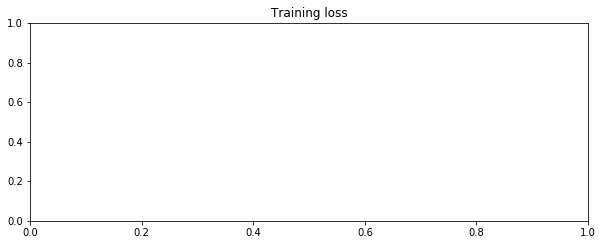

In [260]:

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

In [262]:
N, D, H1, H2, C = 2, 15, 20, 30, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))


In [264]:
for reg in [0, 3.14]:
  print 'Running check with reg = ', reg
  model = FullyConnectedNet([H1, H2], input_dim=D, num_classes=C,
                            reg=reg, weight_scale=5e-2, dtype=np.float64)

  loss, grads = model.loss(X, y)
  print 'Initial loss: ', loss


Running check with reg =  0
Initial loss:  0.0
Running check with reg =  3.14
Initial loss:  0.0
